<a href="https://colab.research.google.com/github/chogerlate/Learning_Stuff/blob/main/pytorch_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



#Import 

In [ ]:
 import torch
 import torch.nn as nn
 import torchvision 
 from torch.utils.data import Dataset, DataLoader
 import torchvision.transforms as transforms
 import math
 import torch.nn.functional as F

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Basic tensor 

## Creating tensor

In [ ]:
x = torch.ones(3) # 1D tensor
print(x)

y = torch.rand(2,2, dtype=torch.float32)
print(y)

z = torch.tensor([1,2,3],dtype = torch.float16)
print(z.add(x))
print(z , z.dtype)

#every method that ended with '_' with be apply inplace
z.add_(torch.tensor([3.5,2.4,2.3],dtype=torch.float32))
print(z, z.dtype)


tensor([1., 1., 1.])
tensor([[0.1215, 0.9829],
        [0.0917, 0.4380]])
tensor([2., 3., 4.])
tensor([1., 2., 3.], dtype=torch.float16) torch.float16
tensor([4.5000, 4.3984, 5.3008], dtype=torch.float16) torch.float16


## Accessing tensor

In [ ]:
#1D tensor 
print(x[:])

#2D  tensor
# print(y[0][1])
print(y[0,1])


tensor([1., 1., 1.])
tensor(0.9829)


## Resizing tensor

In [ ]:
to_reshape = torch.rand(4,4)
print(to_reshape)

reshaped = to_reshape.view(-1,8) # -1 mean it automatical design for us
print(reshaped)

tensor([[0.6297, 0.3406, 0.6976, 0.4333],
        [0.8543, 0.8901, 0.6913, 0.5782],
        [0.0665, 0.2187, 0.4074, 0.1174],
        [0.7127, 0.5930, 0.9205, 0.2288]])
tensor([[0.6297, 0.3406, 0.6976, 0.4333, 0.8543, 0.8901, 0.6913, 0.5782],
        [0.0665, 0.2187, 0.4074, 0.1174, 0.7127, 0.5930, 0.9205, 0.2288]])


## Tensor to numpy array

In [ ]:
# tensor -> numpy
a = torch.ones(5)
print(a[2])
b = a.numpy()
print(b)

# numpy -> tensor 
a = np.zeros((4,4))
print(a)
b = torch.from_numpy(a)
print(b)

tensor(1.)
[1. 1. 1. 1. 1.]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]], dtype=torch.float64)


In [ ]:
if torch.cuda.is_available():
  device = torch.device("cuda")
  #creat variable and store it in gpu
  x = torch.ones(5,device=device)

  #creat variable and move it to gpu
  y = torch.ones(5)
  y = y.to(device)

  z = x+y
  
  z = z.to("cpu")

In [ ]:
x = torch.randn(3,requires_grad=True)
print(x)

y = x*2
print(y)

z = y*y*2
print(z)

# z = z.mean()
# print(z)

#vector jacobian product
v = torch.tensor([0.1,1.0,0.001],dtype = torch.float32)
z.backward(v)
print(x.grad)

# Stop pytorch from tacking gradient
# x.requires_grad_(False)
# x.detach()
# with torch.no_grad():
# weight.grad.zero_() empty our gradient


tensor([-1.2430, -0.5346, -0.3279], requires_grad=True)
tensor([-2.4859, -1.0692, -0.6558], grad_fn=<MulBackward0>)
tensor([12.3594,  2.2863,  0.8600], grad_fn=<MulBackward0>)
tensor([-1.9887e+00, -8.5534e+00, -5.2461e-03])


## Backpropagation

In [ ]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)

#initialize weight
w = torch.tensor(1.0, requires_grad = True)

# forward pass and compute the loss 
y_hat = w*x
loss = (y_hat - y)**2

print(loss)

# backward pass
loss.backward()
print(w.grad)

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


# Modeling

## Linear regression model 1

* prediction: Manually 
* Gradients Computation: Manually
* Loss Computation: Manually
* Parameter updates: Manually


In [ ]:
X = np.array([1,2,3,4], dtype = np.float32) # sample feature
Y = np.array([2,4,6,8], dtype = np.float32) # sample label

w =  0.0

# model prediction
def forward(x):
  return w*x

# loss
def loss(y,y_predicted):
  return ((y_predicted-y)**2).mean()

# gradient
# MSE = 1/N * (w*x -y)**2 -> aka loss FN
# dObjectiveFN/dw = 1/N 2x (w*x - y) -> aka dLoss/dW
def gradient(x,y, y_predicted):
  return np.dot(2*x, y_predicted-y).mean()

print(f'Prediction before trianing: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 20

for epoch in range(n_iters):
  # prediction = forward pass
  y_pred = forward(X)

  #loss 
  l = loss(Y,y_pred)

  # gradients
  dw = gradient(X,Y,y_pred)

  #update weights
  w -= learning_rate * dw 

  if epoch % 1 == 0:
    print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')
  
print(f'Prediction afrer training: f(5) = {forward(5):.3f}')


Prediction before trianing: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.00000000
epoch 2: w = 1.680, loss = 4.79999924
epoch 3: w = 1.872, loss = 0.76800019
epoch 4: w = 1.949, loss = 0.12288000
epoch 5: w = 1.980, loss = 0.01966083
epoch 6: w = 1.992, loss = 0.00314574
epoch 7: w = 1.997, loss = 0.00050331
epoch 8: w = 1.999, loss = 0.00008053
epoch 9: w = 1.999, loss = 0.00001288
epoch 10: w = 2.000, loss = 0.00000206
epoch 11: w = 2.000, loss = 0.00000033
epoch 12: w = 2.000, loss = 0.00000005
epoch 13: w = 2.000, loss = 0.00000001
epoch 14: w = 2.000, loss = 0.00000000
epoch 15: w = 2.000, loss = 0.00000000
epoch 16: w = 2.000, loss = 0.00000000
epoch 17: w = 2.000, loss = 0.00000000
epoch 18: w = 2.000, loss = 0.00000000
epoch 19: w = 2.000, loss = 0.00000000
epoch 20: w = 2.000, loss = 0.00000000
Prediction afrer training: f(5) = 10.000



## Model 2
Backward/back propagation are not exact as numerical gradient computation 

* prediction: Manually 
* Gradients Computation: Autograd
* Loss Computation: Manually
* Parameter updates: Manually

In [ ]:
X = torch.tensor([1,2,3,4], dtype = torch.float32) # sample feature
Y = torch.tensor([2,4,6,8], dtype = torch.float32) # sample label

w =  torch.tensor(0.0, dtype=torch.float32 , requires_grad = True)

# model prediction
def forward(x):
  return w*x

# loss
def loss(y,y_predicted):
  return ((y_predicted-y)**2).mean()



print(f'Prediction before trianing: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
  # prediction = forward pass
  y_pred = forward(X)

  #loss 
  l = loss(Y,y_pred)

  # gradients = backward pass
  l.backward() # dl/dw

  #update weights
  with torch.no_grad():
    w -= learning_rate * w.grad  
   
  # zeor gradients
  w.grad.zero_()
 
  if epoch % 10 == 0:
    print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')
  
print(f'Prediction afrer training: f(5) = {forward(5):.3f}')


Prediction before trianing: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
Prediction afrer training: f(5) = 10.000


## Model 3 4
* prediction: PyTorch Model 
* Gradients Computation: Autograd
* Loss Computation: Pytorch Loss
* Parameter updates: PyTorch Optimizer




In [ ]:
# 1) Design model (input, output size, forward pass)
# 2) Construct loss and optimizer
# 3) Training Loop
#   - forward pass: compute prediction
#   - backward pass: gradients
#   - update weights 

X = torch.tensor([[1],[2],[3],[4]], dtype = torch.float32) # sample feature
Y = torch.tensor([[2],[4],[6],[8]], dtype = torch.float32) # sample label

X_test = torch.tensor([5], dtype=torch.float32)
n_samples, n_features = X.shape
print(f'n_samples: {n_samples} , n_features: {n_features}')

# w =  torch.tensor(0.0, dtype=torch.float32 , requires_grad = True)# init weight

# model prediction
input_size = n_features
output_size = 1

# model = nn.Linear(input_size, output_size)

class LinearRegression(nn.Module):

  def __init__(self,input_dim,output_dim):
    super(LinearRegression, self).__init__()
    #define layers
    self.lin = nn.Linear(input_dim,output_dim)

  def forward(self, x):
    return self.lin(x)

model = LinearRegression(input_size,output_size)

print(f'Prediction before trianing: f(5) = {model(X_test).item():.3f}')
# Training
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):
  # prediction = forward pass
  y_pred = model(X)

  #loss 
  l = loss(Y,y_pred)

  # gradients = backward pass
  l.backward() # dl/dw

  #update weights
  optimizer.step()
   
  # zeor gradients
  optimizer.zero_grad()

  if epoch % 10 == 0:
    [w,b] = model.parameters()
    print("W: ",w," b: ",b)
    print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')
  
print(f'Prediction afrer training: f(5) = {model(X_test).item():.3f}')

n_samples: 4 , n_features: 1
Prediction before trianing: f(5) = 1.129
W:  Parameter containing:
tensor([[0.6081]], requires_grad=True)  b:  Parameter containing:
tensor([-0.4343], requires_grad=True)
epoch 1: w = 0.608, loss = 25.56732368
W:  Parameter containing:
tensor([[1.7665]], requires_grad=True)  b:  Parameter containing:
tensor([-0.0415], requires_grad=True)
epoch 11: w = 1.766, loss = 0.66167700
W:  Parameter containing:
tensor([[1.9531]], requires_grad=True)  b:  Parameter containing:
tensor([0.0208], requires_grad=True)
epoch 21: w = 1.953, loss = 0.01729689
W:  Parameter containing:
tensor([[1.9834]], requires_grad=True)  b:  Parameter containing:
tensor([0.0301], requires_grad=True)
epoch 31: w = 1.983, loss = 0.00061491
W:  Parameter containing:
tensor([[1.9885]], requires_grad=True)  b:  Parameter containing:
tensor([0.0307], requires_grad=True)
epoch 41: w = 1.989, loss = 0.00017356
W:  Parameter containing:
tensor([[1.9896]], requires_grad=True)  b:  Parameter containi

## Linear Regression Model BY Pytorch

epoch: 10, loss = 4387.5298
epoch: 20, loss = 3273.2734
epoch: 30, loss = 2467.1128
epoch: 40, loss = 1883.2329
epoch: 50, loss = 1459.9236
epoch: 60, loss = 1152.7457
epoch: 70, loss = 929.6501
epoch: 80, loss = 767.4950
epoch: 90, loss = 649.5490
epoch: 100, loss = 563.7023


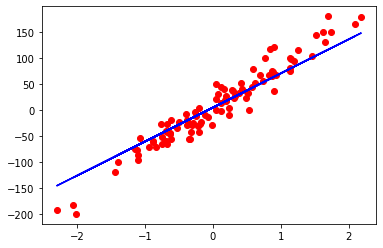

In [ ]:
X_numpy, y_numpy = datasets.make_regression(n_samples = 100, n_features = 1 , noise = 20 , random_state=  1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0],1)

n_samples , n_features = X.shape

# 1) model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2) loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)


# 3) training loop
num_epochs = 100
for epoch in range(num_epochs):
  y_predicted = model(X)
  loss = criterion(y_predicted, y)

  loss.backward()

  optimizer.step()

  optimizer.zero_grad()

  if (epoch+1) % 10 == 0 :
    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')


# plot 
# print(X , model(X))
predicted = model(X).detach().numpy() # detech grad out of our tensor
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()



Logistic regression Model 

In [ ]:
bc = datasets.load_breast_cancer()

X, y = bc.data, bc.target

n_samples , n_features = X.shape
print(n_samples, n_features)

X_train, X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state =1234)

#scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0],1)
y_test = y_test.view(y_test.shape[0],1)

# 1) model
class LogisticRegression(nn.Module):
  def __init__(self,n_input_features):
    super(LogisticRegression,self).__init__()
    self.linear = nn.Linear(n_input_features,1)

  def forward(self,x):
    y_predicted = torch.sigmoid(self.linear(x))
    return y_predicted

model = LogisticRegression(n_features)

# 2) loss and optimizer
learning_rate = 0.01
criterion = nn.BCELoss() # BinaryCrossEntropy
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)


# 3) training loop
num_epochs = 100
for epoch in range(num_epochs):
  y_predicted = model(X_train)
  loss = criterion(y_predicted, y_train)

  loss.backward()

  optimizer.step()

  optimizer.zero_grad()

  if (epoch+1) % 10 == 0 :
    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')


with torch.no_grad():
  y_predicted = model(X_test)
  y_predicted_cls = y_predicted.round()
  acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
  print(f'accurary = {acc:.4f}')



569 30
epoch: 10, loss = 0.6881
epoch: 20, loss = 0.5232
epoch: 30, loss = 0.4298
epoch: 40, loss = 0.3709
epoch: 50, loss = 0.3305
epoch: 60, loss = 0.3010
epoch: 70, loss = 0.2784
epoch: 80, loss = 0.2604
epoch: 90, loss = 0.2457
epoch: 100, loss = 0.2335
accurary = 0.9211


## Dataset and DataLoader

In [ ]:
torch.tensor([5])

tensor([5])

In [ ]:
!wget https://raw.githubusercontent.com/patrickloeber/pytorchTutorial/master/data/wine/wine.csv /content/wine

--2023-01-15 12:26:28--  https://raw.githubusercontent.com/patrickloeber/pytorchTutorial/master/data/wine/wine.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10889 (11K) [text/plain]
Saving to: ‘wine.csv’

wine.csv            100%[===================>]  10.63K  --.-KB/s    in 0s      

2023-01-15 12:26:28 (106 MB/s) - ‘wine.csv’ saved [10889/10889]

/content/wine: Scheme missing.
FINISHED --2023-01-15 12:26:28--
Total wall clock time: 0.04s
Downloaded: 1 files, 11K in 0s (106 MB/s)


In [ ]:
class WineDataset(Dataset):
  
  def __init__(self):
    xy = np.loadtxt('/content/wine.csv', delimiter = ',' , dtype = np.float32 , skiprows = 1)
    self.x = xy[:,1:] # read feature columns
    self.y = xy[:,[0]] # n_sample, 1 read target column
    self.n_samples = xy.shape[0]

  def __getitem__(self, index):  # redefine access method
    return self.x[index], self.y[index]

  def __len__(self): # redefine len method 
    return self.n_samples

dataset = WineDataset()
first_data = dataset[0]
print(first_data)
features , labels = first_data
print(features, labels)

(array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
       3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
       1.065e+03], dtype=float32), array([1.], dtype=float32))
[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03] [1.]


In [ ]:
dataloader = DataLoader(dataset = dataset , batch_size = 4, shuffle = True,num_workers = 2)
dataiter = iter(dataloader)

In [ ]:
print(dataiter)
data = next(dataiter)
features, labels = data
print(features, labels)

tensor([[1.2930e+01, 2.8100e+00, 2.7000e+00, 2.1000e+01, 9.6000e+01, 1.5400e+00,
         5.0000e-01, 5.3000e-01, 7.5000e-01, 4.6000e+00, 7.7000e-01, 2.3100e+00,
         6.0000e+02],
        [1.3630e+01, 1.8100e+00, 2.7000e+00, 1.7200e+01, 1.1200e+02, 2.8500e+00,
         2.9100e+00, 3.0000e-01, 1.4600e+00, 7.3000e+00, 1.2800e+00, 2.8800e+00,
         1.3100e+03],
        [1.2850e+01, 3.2700e+00, 2.5800e+00, 2.2000e+01, 1.0600e+02, 1.6500e+00,
         6.0000e-01, 6.0000e-01, 9.6000e-01, 5.5800e+00, 8.7000e-01, 2.1100e+00,
         5.7000e+02],
        [1.3750e+01, 1.7300e+00, 2.4100e+00, 1.6000e+01, 8.9000e+01, 2.6000e+00,
         2.7600e+00, 2.9000e-01, 1.8100e+00, 5.6000e+00, 1.1500e+00, 2.9000e+00,
         1.3200e+03]]) tensor([[3.],
        [1.],
        [3.],
        [1.]])


In [ ]:
# training loop
num_epochs = 2 
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4)
print(total_samples, n_iterations)

for epoch in range(num_epochs):
  for i, (inputs,labels) in enumerate(dataloader):
    # forward backward , update
    # print(f'input: {inputs} \n labels: {labels}')
    if (i+1)% 5 == 0:
      print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_iterations}, input {inputs.shape}')

178 45
epoch 1/2, step 5/45, input torch.Size([4, 13])
epoch 1/2, step 10/45, input torch.Size([4, 13])
epoch 1/2, step 15/45, input torch.Size([4, 13])
epoch 1/2, step 20/45, input torch.Size([4, 13])
epoch 1/2, step 25/45, input torch.Size([4, 13])
epoch 1/2, step 30/45, input torch.Size([4, 13])
epoch 1/2, step 35/45, input torch.Size([4, 13])
epoch 1/2, step 40/45, input torch.Size([4, 13])
epoch 1/2, step 45/45, input torch.Size([2, 13])
epoch 2/2, step 5/45, input torch.Size([4, 13])
epoch 2/2, step 10/45, input torch.Size([4, 13])
epoch 2/2, step 15/45, input torch.Size([4, 13])
epoch 2/2, step 20/45, input torch.Size([4, 13])
epoch 2/2, step 25/45, input torch.Size([4, 13])
epoch 2/2, step 30/45, input torch.Size([4, 13])
epoch 2/2, step 35/45, input torch.Size([4, 13])
epoch 2/2, step 40/45, input torch.Size([4, 13])
epoch 2/2, step 45/45, input torch.Size([2, 13])


# Data Loader and Data set


data with transformation 

In [ ]:
class WineDataset(Dataset):
  
  def __init__(self, transform = None):
    xy = np.loadtxt('/content/wine.csv', delimiter = ',' , dtype = np.float32 , skiprows = 1)
    self.x = xy[:,1:] # read feature columns
    self.y = xy[:,[0]] # n_sample, 1 read target column
    self.n_samples = xy.shape[0]

    self.transform = transform

  def __getitem__(self, index):  # redefine access method
    sample = self.x[index], self.y[index]
    
    if self.transform:
      sample = self.transform(sample)
    
    return sample


  def __len__(self): # redefine len method 
    return self.n_samples

class  ToTensor: # transform narray to tensor
  def __call__(call,sample):
    inputs, targets = sample
    return torch.from_numpy(inputs), torch.from_numpy(targets)

class MulTransform: # multiply tensor by factor
  def __init__(self, factor):
    self.factor = factor
  
  def __call__(self, sample):
    inputs, targets = sample
    inputs *= self.factor
    return inputs, targets

dataset = WineDataset(transform = None)
first_data = dataset[0]
print(first_data)
features , labels = first_data
print(type(features), type(labels))

composed = torchvision.transforms.Compose([ToTensor(), 
                                           MulTransform(2)])# Create sequence of transform
dataset = WineDataset(transform = composed)
first_data = dataset[0]
print(first_data)
features , labels = first_data
print(type(features), type(labels))


(array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
       3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
       1.065e+03], dtype=float32), array([1.], dtype=float32))
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(tensor([2.8460e+01, 3.4200e+00, 4.8600e+00, 3.1200e+01, 2.5400e+02, 5.6000e+00,
        6.1200e+00, 5.6000e-01, 4.5800e+00, 1.1280e+01, 2.0800e+00, 7.8400e+00,
        2.1300e+03]), tensor([1.]))
<class 'torch.Tensor'> <class 'torch.Tensor'>


# Soft max
[0 , 1]

In [ ]:
def softmax(x):
  return np.exp(x)/np.sum(np.exp(x), axis=0) 

x = np.array([2.0,1.0,0.1])
outputs = softmax(x)
print('softmax numpy:', outputs)

x = torch.tensor([2.0,1.0,0.1])
outputs = torch.softmax(x,dim=0)
print(outputs)

softmax numpy: [0.65900114 0.24243297 0.09856589]


# Cross-entropy

In [ ]:
def cross_entropy(actual, predicted):
  loss = -np.sum(actual * np.log(predicted))
  return loss

# label that alread had One-hot encodered
Y = np.array([0,1,0])

Y_pred_good = np.array([0.7,0.2,0.1])
Y_pred_bad = np.array([0.1,0.3,0.6])

l1 =  cross_entropy(Y,Y_pred_good)
l2 =  cross_entropy(Y,Y_pred_bad)

print(f'Loss1 numpy: {l1:.4f}')
print(f'Loss2 numpy: {l2:.4f}')

Loss1 numpy: 1.6094
Loss2 numpy: 1.2040


In [ ]:
loss = nn.CrossEntropyLoss()

# sample 
Y = torch.tensor([2])

# nsamples x nclasses = 1x3
# จำลองค่าที่ predict ในที่ predict มีแค่ 3 ค่าให้เทียบกันเท่านั้นแสดงว่ามี 3 class 
y_pred_good = torch.tensor([[2.0, 1.0, 0.1]])
y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]])

l1 =  loss(y_pred_good , Y)
l2 =  loss(y_pred_bad, Y)


print(f'Loss1 numpy: {l1.item():.4f}')
print(f'Loss2 numpy: {l2.item():.4f}')

_, prediction1 = torch.max(y_pred_good, 1)
_, prediction2 = torch.max(y_pred_bad, 1)
print(prediction1 )
print(prediction2)

Loss1 numpy: 2.3170
Loss2 numpy: 2.0406
tensor([0])
tensor([1])


# FeedForward Neural network

In [ ]:
# hyper parameters
input_size = 784 # 28x28
hidden_size = 100 
num_classes = 10
num_epochs = 2
batch_size = 100 
learning_rate = 0.001

# MNIST
train_dataset = torchvision.datasets.MNIST( root='./data', train=True, 
                                           transform = transforms.ToTensor(), download=True)

test_dataset = torchvision.datasets.MNIST( root='./data', train = False, 
                                           transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size ,
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size ,
                                           shuffle = False)

examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

torch.Size([100, 1, 28, 28]) torch.Size([100])


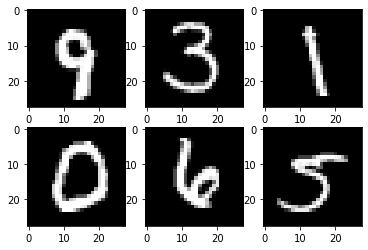

In [ ]:
for i in range(6):
  plt.subplot(2,3, i+1)
  plt.imshow(samples[i+5][0], cmap= 'gray')
plt.show()


In [ ]:
class NeuralNet(nn.Module):
  def __init__(self,input_size, hidden_size, num_classes):
    super(NeuralNet,self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out 

model = NeuralNet(input_size, hidden_size, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    images = images.reshape(-1, 28*28).to(device) #Flatten from 28*28 to 784
    labels = labels.to(device)

    #forward
    outputs = model(images)
    loss = criterion(outputs, labels)

    #backward
    optimizer.zero_grad() #clear grad variable
    loss.backward() # get new grad value
    optimizer.step() # update our weight

    if(i+1) % 100 == 0 :
      print(f'epoch {epoch +1} / {num_epochs}, step {i+1}/{n_total_steps}, loss={loss.item():.4f}')

# test
with torch.no_grad():
  n_correct = 0 
  n_samples = 0 
  for images, labels in test_loader :
    images = images.reshape(-1,28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)

    _, predictions = torch.max(outputs, 1)
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item()

  acc = 100.0 * n_correct / n_samples
  print(f'accuracu = {acc}')



epoch 1 / 2, step 100/600, loss=0.4112
epoch 1 / 2, step 200/600, loss=0.4952
epoch 1 / 2, step 300/600, loss=0.3753
epoch 1 / 2, step 400/600, loss=0.2262
epoch 1 / 2, step 500/600, loss=0.2930
epoch 1 / 2, step 600/600, loss=0.3091
epoch 2 / 2, step 100/600, loss=0.1691
epoch 2 / 2, step 200/600, loss=0.2796
epoch 2 / 2, step 300/600, loss=0.1938
epoch 2 / 2, step 400/600, loss=0.2810
epoch 2 / 2, step 500/600, loss=0.1162
epoch 2 / 2, step 600/600, loss=0.2308
accuracu = 94.94


# CNN

In [ ]:
num_epochs  = 5
batch_size = 4
learning_rate = 0.001

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]
)

train_dataset = torchvision.datasets.CIFAR10(root='./data', train = True,
                                             download = True, transform = transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train = False,
                                             download = True, transform = transform)
train_loader = torch.utils.data.DataLoader(train_dataset , batch_size = batch_size, shuffle = True)

test_loader = torch.utils.data.DataLoader(test_dataset , batch_size = batch_size, shuffle = False )

classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')



  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
class ConvNet(nn.Module): # Create model
  def __init__(self):
    super(ConvNet,self).__init__()
    self.conv1 = nn.Conv2d(3,6,5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6,16,5)
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)
  
  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1,16*5*5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

model = ConvNet().to(device) # ยัด model เข้าไป  process ใน gpu

criterion = nn.CrossEntropyLoss() # lossFN for Multi-classification Problem
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

n_total_steps = len(train_loader) # total in each training epochs
for epoch in range(num_epochs):
  for i , (images, labels) in enumerate(train_loader):
    # origin_shape [4,3,32,32] = 4 = batch_size ,3 = channel ,1024 = w*h pixels
    # input_layer : 3 input channels, 6 output channels , 5 kernel size 
    images = images.to(device)
    labels = labels.to(device)

    #forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)

    #Backward and optimize
    optimizer.zero_grad() # clear current weight 
    loss.backward() # calculate next weights
    optimizer.step() # update weights   

    if (i+1) % 2000 == 0 :
      print(f'Epoch [{epoch+1}/{num_epochs}], step [{i+1}/{n_total_steps}], loss: {loss.item():.4f} ')

print('Finished Training')




Epoch [1/5], step [2000/12500], loss: 2.2870 
Epoch [1/5], step [4000/12500], loss: 2.2917 
Epoch [1/5], step [6000/12500], loss: 2.2812 
Epoch [1/5], step [8000/12500], loss: 2.2741 
Epoch [1/5], step [10000/12500], loss: 2.2559 
Epoch [1/5], step [12000/12500], loss: 2.1862 
Epoch [2/5], step [2000/12500], loss: 2.0955 
Epoch [2/5], step [4000/12500], loss: 1.6076 
Epoch [2/5], step [6000/12500], loss: 1.6540 
Epoch [2/5], step [8000/12500], loss: 1.5627 
Epoch [2/5], step [10000/12500], loss: 2.3302 
Epoch [2/5], step [12000/12500], loss: 1.2353 
Epoch [3/5], step [2000/12500], loss: 1.2430 
Epoch [3/5], step [4000/12500], loss: 2.0873 
Epoch [3/5], step [6000/12500], loss: 1.5616 
Epoch [3/5], step [8000/12500], loss: 2.6558 
Epoch [3/5], step [10000/12500], loss: 1.8875 
Epoch [3/5], step [12000/12500], loss: 1.5898 
Epoch [4/5], step [2000/12500], loss: 1.1586 
Epoch [4/5], step [4000/12500], loss: 2.2712 
Epoch [4/5], step [6000/12500], loss: 1.5511 
Epoch [4/5], step [8000/1250

In [ ]:
with torch.no_grad():
  n_correct = 0 
  n_samples = 0
  n_class_correct = [0 for i in range(10)]
  n_class_samples = [0 for i in range(10)]
  for images, labels in test_loader:
    images = images.to(device) 
    labels = labels.to(device)
    outputs = model(images)

    #max return (value, index)
    _, predicted = torch.max(outputs, 1)
    n_samples += labels.size(0)
    n_correct += (predicted == labels).sum().item()

  
    for i in range(batch_size):
      # print(labels[i] , predicted[i])
      label = labels[i]
      pred = predicted[i]
      if (label == pred):
          n_class_correct[label] += 1
      n_class_samples[label] += 1
    # print(n_class_samples)
  acc = 100.0* n_correct / n_samples
  print(f'Accuracy of the network: {acc} %')

  for i in range(10): # print the acc of each class
    acc = 100.0 * n_class_correct[i] / n_class_samples[i]
    print(f'Accuracy of {classes[i]}: {acc} %')


Accuracy of the network: 49.02 %
Accuracy of plane: 72.9 %
Accuracy of car: 62.9 %
Accuracy of bird: 35.6 %
Accuracy of cat: 16.9 %
Accuracy of deer: 34.6 %
Accuracy of dog: 35.1 %
Accuracy of frog: 65.2 %
Accuracy of horse: 63.9 %
Accuracy of ship: 49.8 %
Accuracy of truck: 53.3 %


# TensorBoard
- Pls run FeedForward Neural network before progress in this section

# Save Model
- torch.save(arg,PATH)
- torch.load(PATH)
- model.load_state_dict(arg)

In [ ]:
# lazy save
# torch.save(model, PATH)
# model = torch.load(PATH)
# model.eval()

# Save model for inference
# torch.save(model.state_dict(),PATH)
# model = Model(*args, **kwargs)
# model.load_state_dict(torch.load(PATH))
# model.eval()
